## Pytorch 모델 만들기

In [1]:
import os
import torch
from torch import nn                            # 신경망모듈
from torch.utils.data import DataLoader         # 데이터 로딩 관련 모듈
from torchvision import datasets, transforms    # torch저장소 데이터 셋 모듈

In [2]:
# 메모리 에러
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [20]:
t1=torch.tensor([1,2,3])

In [22]:
# add -> 원본 변경x
t1.add(10), t1

(tensor([11, 12, 13]), tensor([1, 2, 3]))

In [23]:
# add_ -> 원본 변경o
t1.add_(10), t1

(tensor([11, 12, 13]), tensor([11, 12, 13]))

## [1] 데이터 준비

In [3]:
# Tensor의 저장소 설정을 위한 체크
# cuda 있을경우 GPU사용 아니면 cpu사용
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


### NN 모델 생성
---

In [4]:
# 순차적인 Layer 구성 -> Sequential, Layer....


# 필수: init, forward
class NeuralNetwork(nn.Module):
    
    # 생성자 메서드, NeuralNetwork() 객체 생성 시 실행
    def __init__(self):
        
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        
        self.linear_relu_stack = nn.Sequential(
            
            # 입력층(input_dim, output_dim)
            nn.Linear(28*28, 512),
            nn.ReLU(),
            
            # 은닉층(input_dim, output_dim)
            nn.Linear(512, 512),
            nn.ReLU(),
            
            # 출력층(input_dim, output_dim)
            nn.Linear(512, 10),
        )

    # NN 모델이 동작을 시작할 때 실생
    def forward(self, x):
        
        # 1차월으로 데이터 변환
        x = self.flatten(x)
        
        # NN모델에 입력 데이터 전달
        logits = self.linear_relu_stack(x)
        return logits

In [5]:
# NN모델 생성
mnistM=NeuralNetwork().to(device)

In [7]:
print(mnistM)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [8]:
# 데이터 준비
x=torch.rand(1, 28, 28, device=device)
print(f'x.dim:{x.dim()}')
print(f'x.shape:{x.shape}')

x.dim:3
x.shape:torch.Size([1, 28, 28])


In [10]:
# 학습
logits=mnistM(x)

In [11]:
print(f'학습결과:--------------\n{logits}, {logits.shape}')

학습결과:--------------
tensor([[-0.0050,  0.0735, -0.0310,  0.0231, -0.0808,  0.0279, -0.0266, -0.0261,
         -0.0212,  0.0802]], grad_fn=<AddmmBackward0>), torch.Size([1, 10])


In [12]:
# 결과 분석
pred_probab=nn.Softmax(dim=1)(logits)
print(f'pred_probab: {pred_probab}')

y_pred=pred_probab.argmax(1)
print(f'y_pred: {y_pred}')

pred_probab: tensor([[0.0993, 0.1074, 0.0967, 0.1021, 0.0920, 0.1026, 0.0971, 0.0972, 0.0977,
         0.1081]], grad_fn=<SoftmaxBackward0>)
y_pred: tensor([9])


In [13]:
# PyTorch의 Dataset 사용

# 데이터 -> Tensor로 변환
from torchvision.transforms import ToTensor 

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [14]:
type(training_data), training_data.data.shape

(torchvision.datasets.mnist.FashionMNIST, torch.Size([60000, 28, 28]))

In [15]:
type(test_data), test_data.data.shape

(torchvision.datasets.mnist.FashionMNIST, torch.Size([10000, 28, 28]))

img.shape: torch.Size([1, 28, 28])
a.shape: torch.Size([28, 28])
img.shape: torch.Size([1, 28, 28])
a.shape: torch.Size([28, 28])
img.shape: torch.Size([1, 28, 28])
a.shape: torch.Size([28, 28])
img.shape: torch.Size([1, 28, 28])
a.shape: torch.Size([28, 28])
img.shape: torch.Size([1, 28, 28])
a.shape: torch.Size([28, 28])
img.shape: torch.Size([1, 28, 28])
a.shape: torch.Size([28, 28])
img.shape: torch.Size([1, 28, 28])
a.shape: torch.Size([28, 28])
img.shape: torch.Size([1, 28, 28])
a.shape: torch.Size([28, 28])
img.shape: torch.Size([1, 28, 28])
a.shape: torch.Size([28, 28])


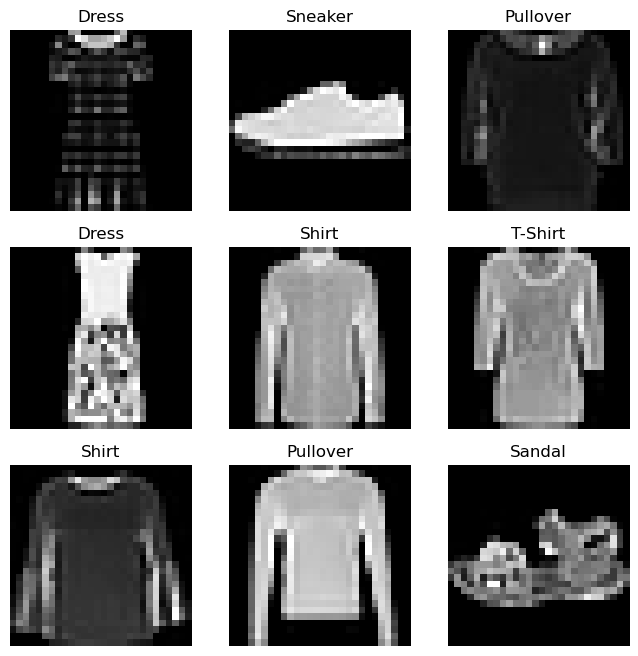

In [18]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    
    # squeeze() 메서드 확인
    print(f'img.shape: {img.shape}')
    a=img.squeeze()
    print(f'a.shape: {a.shape}')
    
    
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()